<a href="https://colab.research.google.com/github/ChetanB1997/Stock-market-prediction/blob/main/stock_market_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/arashnic/time-series-forecasting-with-yahoo-stock-price?datasetId=986308&sortBy=voteCount&select=yahoo_stock.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/project /stock market")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.optimizers import Adam
import statistics
plt.style.use('fivethirtyeight')

df=pd.read_csv('yahoo_stock.csv')

In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [ ]:
df.shape

(1825, 7)

In [ ]:
len(df['Date'].unique())

1825

as the unique dates are equal to no of rows so no any duplicate dates are there


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [ ]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

date column has object type to change it to DATETIME type

In [ ]:
df.Date=pd.to_datetime(df['Date'])

In [ ]:
df.Date.min(),df.Date.max()

(Timestamp('2015-11-23 00:00:00'), Timestamp('2020-11-20 00:00:00'))

after comverting the datetime type will check the stock market data which is available hare is from dates 23/11/15 to 20/11/20

In [ ]:
df.set_index("Date", inplace=True)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


<Axes: xlabel='Date'>

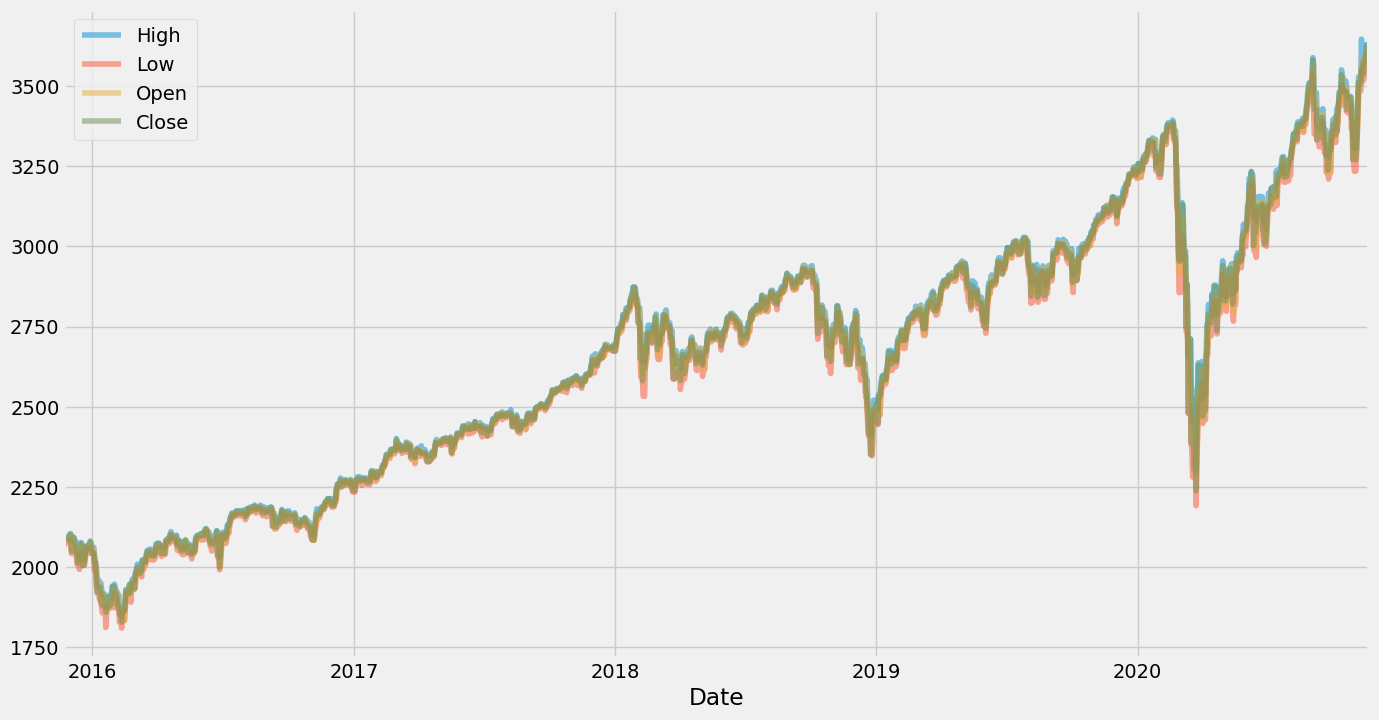

In [ ]:
df[['High','Low','Open','Close']].plot(figsize=(15,8), alpha=0.5)

<Axes: >

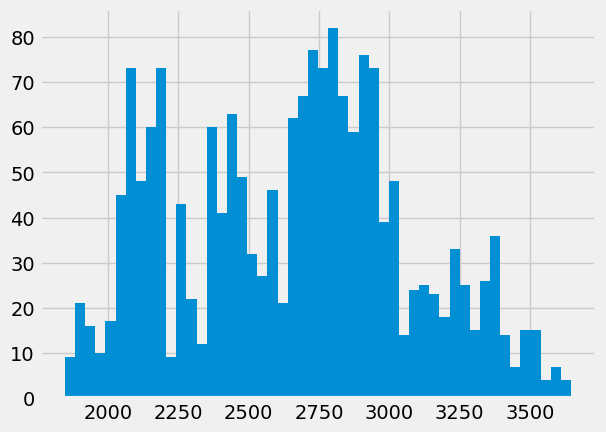

In [ ]:
df.High.hist(bins=50)

if we scee the distibition of plot it shows left skewed data

now will split the data into 10 parts to compute the mean and variance of each group

In [ ]:
df.shape[0]

1825

In [ ]:
np.round(df.shape[0]/10,0)

182.0

In [ ]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(0,10):
    mean.append(df['High'].iloc[(i*182):((i+1)*182)].mean())
    std.append(stdev(df['High'].iloc[(i*182):((i+1)*182)]))

creating column for 10 groups of their mean and std deviation

In [ ]:
pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,2019.354300,71.041024
1,2147.740282,36.287599
2,2322.969570,60.228422
3,2489.706581,55.878102
4,2711.253743,63.125935
5,2816.088946,68.351685
6,2754.165647,131.792411
7,2965.153137,74.059325
8,3045.669328,267.695412
9,3309.076588,165.733813


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

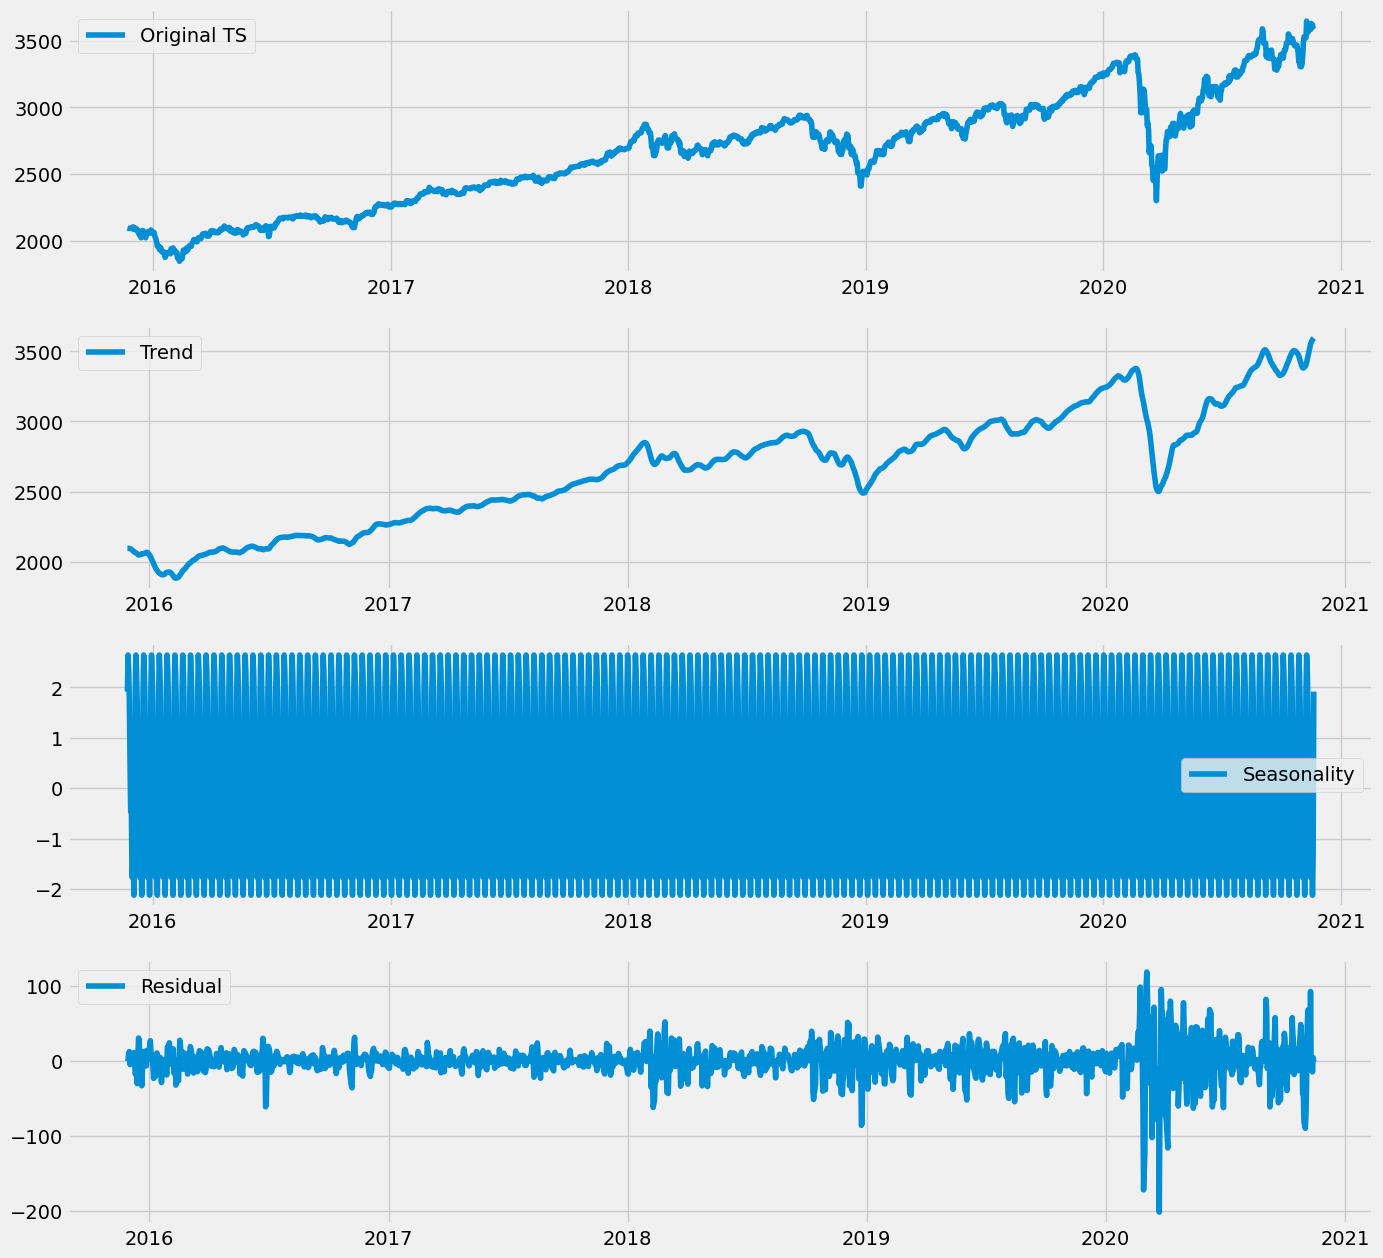

In [ ]:
decompose_add=seasonal_decompose(df['High'], model='additive', period=12)

plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')

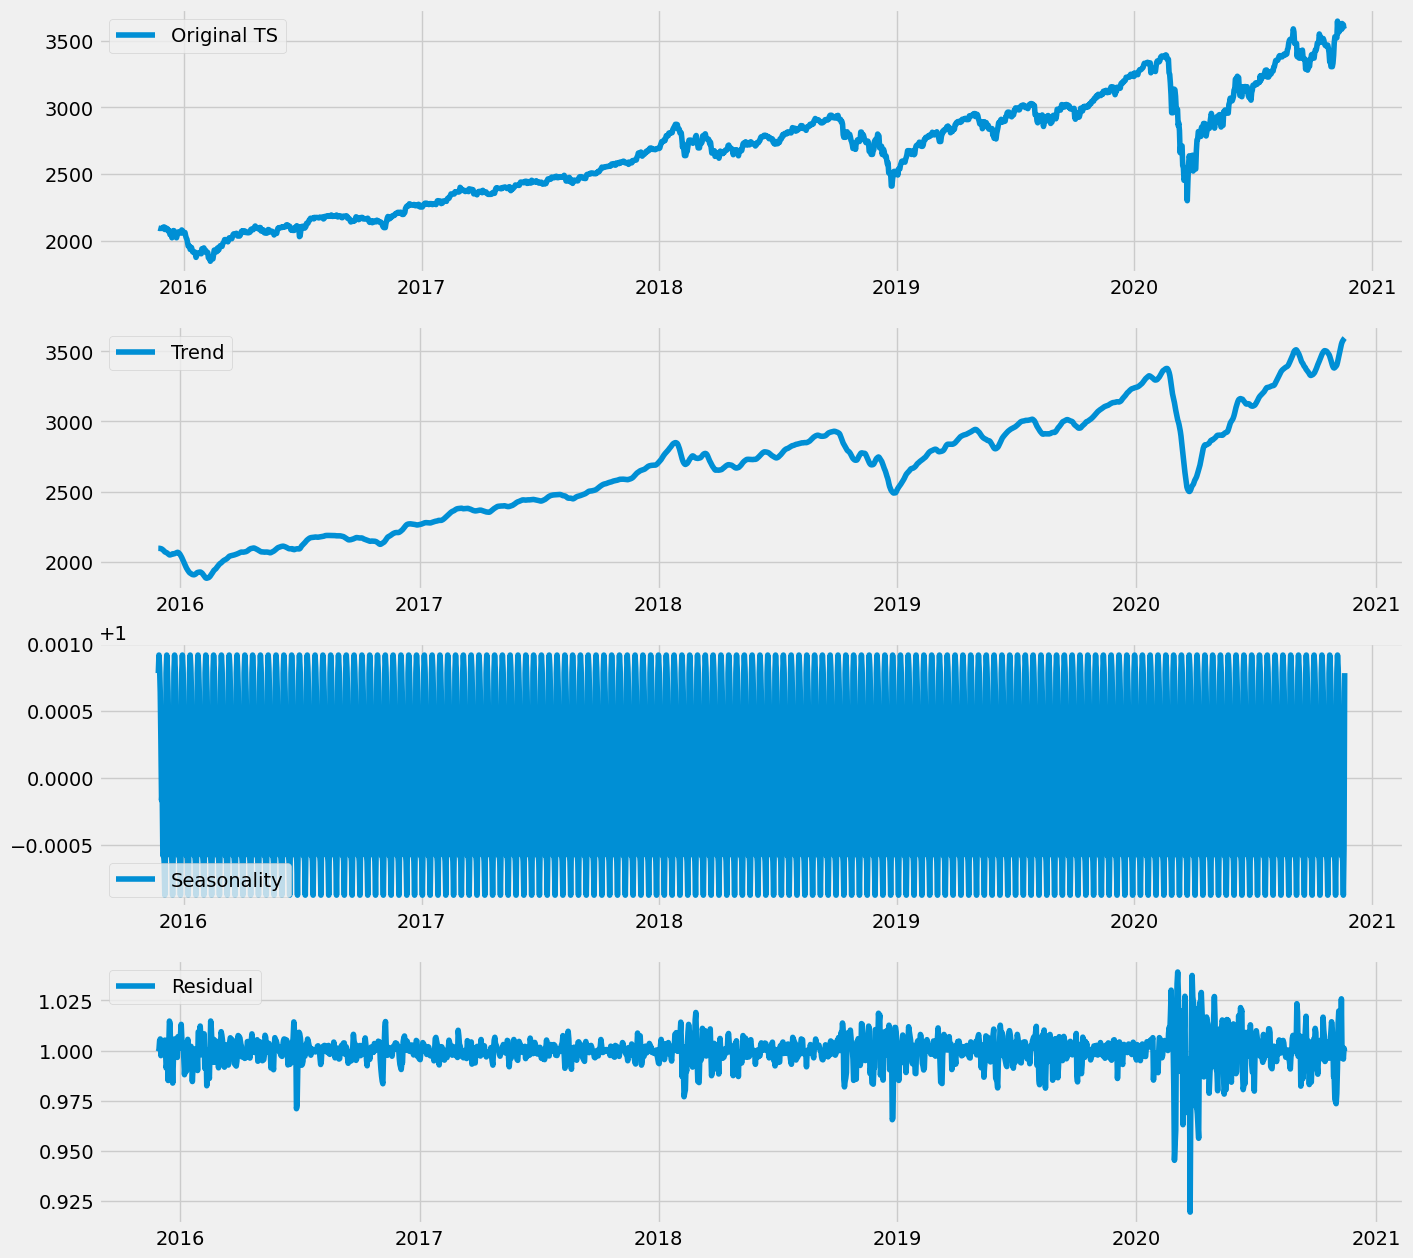

In [ ]:
decompose_mul=seasonal_decompose(df['High'], model='multiplicative', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_mul.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_mul.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_mul.resid, label='Residual')
plt.legend(loc='best')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

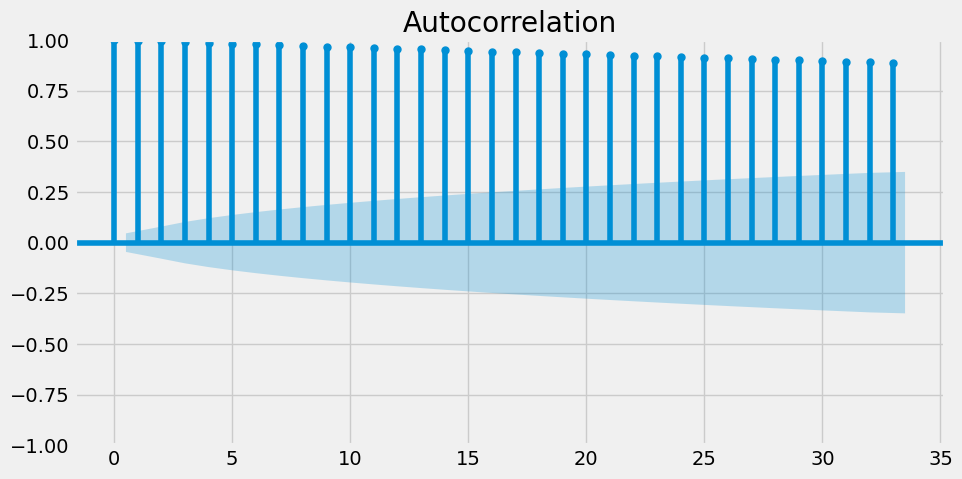

In [ ]:
plt.rc("figure", figsize=(10,5))
plot_acf(df['High'])
print()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


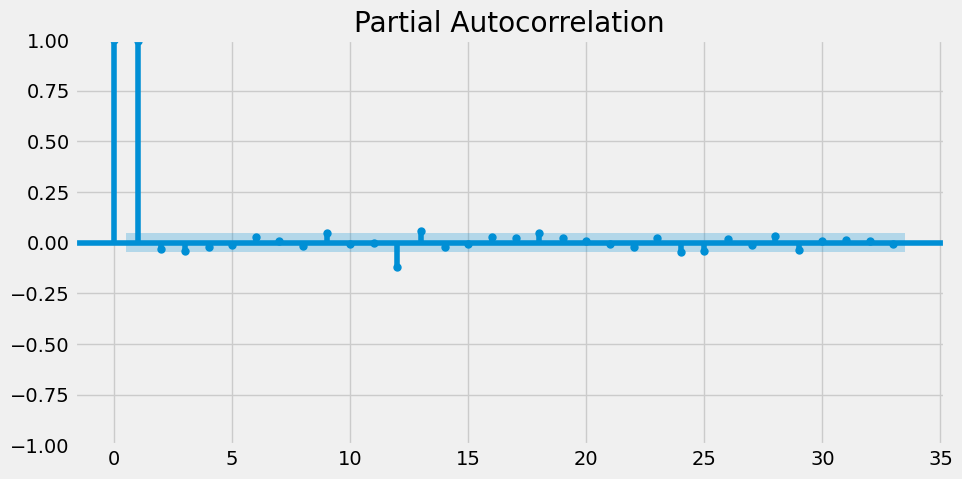

In [ ]:
plt.rc("figure", figsize=(10,5))
plot_pacf(df['High'])
print()

#model


##Firstly, we will define a new dataset equal to the existing one, but omitting the last four records, later we will use the model to predict such values.

In [ ]:
new_df=df['High'].iloc[:-4]

#will specify the training from first 80% and test data from 20 % in from total samples

In [ ]:
train_len = round(len(new_df)*0.8)
train_len

1457

In [ ]:
#assume the window od 10 
window=10

In [ ]:
train_data = new_df[0:train_len]

X_train=[]
Y_train=[]

for i in range(window, len(train_data)):       #range(10:1457)
    X_train.append(train_data[i-window:i])      #[10-10:10]=[0:10],[11-10:11]=[1:11],[12-10:12]=[2:12],[13-10:13]=[3:13],[14-10:14]=[4:14],........
    Y_train.append(train_data[i])               #[10],[11],[12],[13],[14],.........

In [ ]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

Reshaping the training set to
(number of records-window, number of time steps, 1) :

In [ ]:
X_train.shape

(1447, 10)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1447, 10, 1)

In [ ]:
X_train[0]

array([[2095.61010742],
       [2094.12011719],
       [2093.        ],
       [2093.        ],
       [2093.29003906],
       [2093.29003906],
       [2093.29003906],
       [2093.81005859],
       [2103.37011719],
       [2104.27001953]])

In [ ]:
##model 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))     #input(10,1) as for 1 window there are 10 arrays
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

In [ ]:
test_data = new_df[train_len-window:]

X_val=[]
Y_val=[] 

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

In [ ]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [ ]:
X_val.shape, Y_val.shape

((364, 10, 1), (364,))

Now that our validation set has the correct shape we can use it in the model to predict the next value.

In [ ]:
prediction = model.predict(X_val)

12/12 [==============================] - 0s 3ms/step


In [ ]:
len(prediction), len(Y_val)

(364, 364)

As our prediction and actual values have the same shape we can use these sets to compute the error metrics, in this case we will use RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

12/12 [==============================] - 0s 4ms/step
Train rmse: 31.585093878166077
Validation rmse: 83.80510824701906


Both errors are high, if we specifically see the validation one we could say it's too much and we aim to improve this as we build a robust model in the next steps.
Below is a table which merged the actual and predicted values, therefore we can see for each record how differ these two and have an idea of how sidetracked we currently are

In [ ]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2019-11-19,3127.639893,3106.250000
2019-11-20,3118.969971,3109.609375
2019-11-21,3110.110107,3112.802246
2019-11-22,3112.870117,3116.171143
2019-11-23,3112.870117,3117.696777
...,...,...
2020-11-12,3569.020020,3500.241699
2020-11-13,3593.659912,3527.191895
2020-11-14,3593.659912,3550.157715


Below we can see a simple plot showing both curves, in which clearly there is a difference and a sort of shift to the right or delay in the prediction curve.

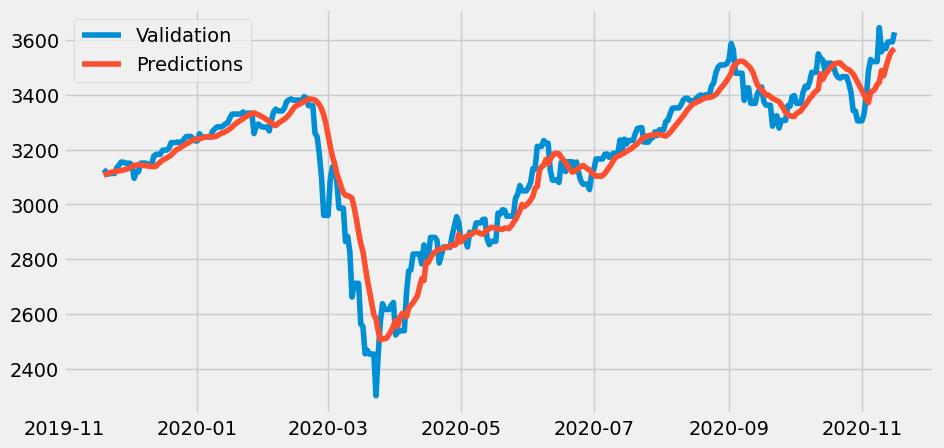

In [ ]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

Finally, the plot showing training, validation and prediction curves:

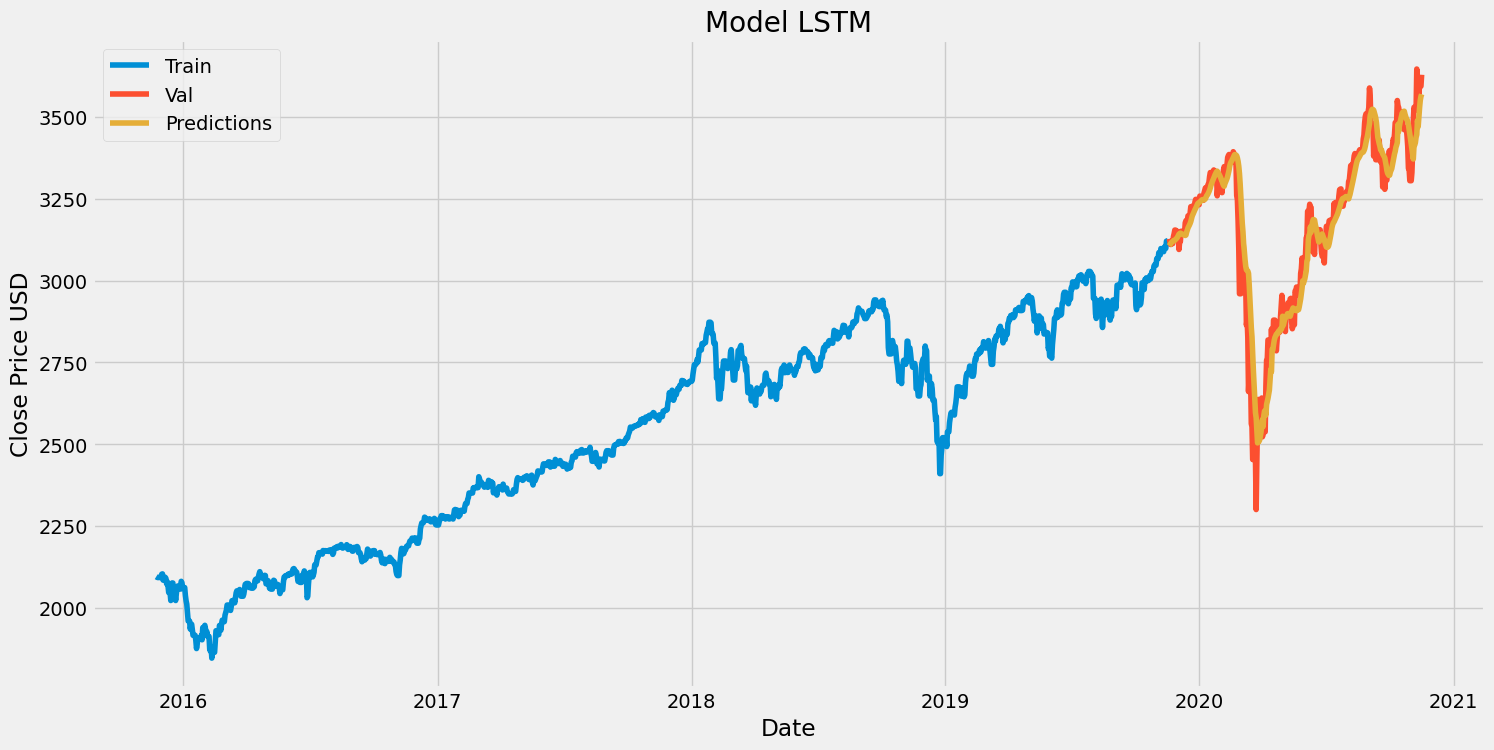

In [ ]:
train = new_df[:train_len]
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()